In [52]:
import pyspark 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
def extractDataset():
    try:
        pathToDataset = "C:\\Users\\Kevin Neung\\OneDrive\\Desktop\\kaggle_datasets\\adm_data.csv"
        dataset = pd.read_csv(pathToDataset)
        return dataset
    except FileNotFoundError:
        print("The file was not found. Please check the path.")
    except pd.errors.EmptyDataError:
        print("The file is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")

data = extractDataset()
if data is not None:
    print(data.head())
    

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


In [44]:
#Look for missing data within the dataset
# my personal reusable function for detecting missing data
def describeMissingData(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (descending):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
describeMissingData(data)

Number of columns with missing values: 0
No missing data!!!


In [45]:
#Remove the ID column before ML training
data = data.drop(['Serial No.'], axis = 1)
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [46]:
#Print the shape of the dataset
print("Dataset Shape: ", data.shape)

Dataset Shape:  (400, 8)


In [47]:
#Print a general statistical summary
print(data.describe())

        GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit  
count  400.000000  400.000000       400.000000  
mean     8.598925    0.547500         0.724350  
std      0.596317    0.498362         0.142609  
min      6.800000    0.000000         0.340000  
25%      8.170000    0.000000         0.640000  
50%      8.6

In [48]:
admissionsNumbersOnly = data[['Chance of Admit']]

     Chance of Admit
0               0.92
1               0.76
2               0.72
3               0.80
4               0.65
..               ...
395             0.82
396             0.84
397             0.91
398             0.67
399             0.95

[400 rows x 1 columns]


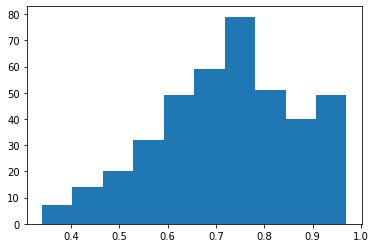

In [51]:
admissionsNumbersOnly = data[['Chance of Admit']]
print(admissionsNumbersOnly)
plt.hist(admissionsNumbersOnly)
plt.show()


In [50]:
def main():
    dataset = extractDataset()
    print(dataset)
